In [89]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [69]:
f = open('log_output_cleaned.txt')
lines = f.readlines()
lines[18860]

'2022-06-21----15:10:51,624---- sort : java.lang.String : ##default = Q_30010_40|asc\n'

In [70]:
df = pd.read_csv('log_output_cleaned.txt', sep="----", header=None, names=["date", "time", "error message"])

C:\Users\ID77894\AppData\Local\Temp\1\ipykernel_12364\1857500909.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('log_output_cleaned.txt', sep="----", header=None, names=["date", "time", "error message"])


In [71]:
df['error message'][45474]

'   </Address>'

In [72]:
df['error message'][2000:2050]

2000               <subjectCustomerID>346716201</subje...
2001               <subjectLicenseState>ID</subjectLic...
2002               <subjectLicenseNbr>AA111312B</subje...
2003               <subjectFirstNm>Maria</subjectFirstNm>
2004                 <subjectLastNm>Hkqoh</subjectLastNm>
2005                         <mismatchInd>N</mismatchInd>
2006               <subjectBirthDt>05/16/1984</subject...
2007               <receivedTimestamp>2022-06-21 15:06...
2008                <orderStatus>NOTORDERED</orderStatus>
2009                   <mvrReturnCount>0</mvrReturnCount>
2010                                   <secondaryParents>
2011                 <reportOrderSubject>2</reportOrde...
2012                                  </secondaryParents>
2013                                       </ReportOrder>
2014                          <ReportOrder ExtAction="A">
2015               <subjectFullName>Hkqoh, Maria</subj...
2016                         <reportType>MVR</reportType>
2017          

In [73]:
df['error message'] = [re.sub("[^a-zA-Z ]", " ", x).strip() for x in df['error message']]
df['error message'] = [ re.sub('<[^>]+>', '', x).strip() for x in df['error message']]
df['error message'] = df['error message'].str.lower()

In [74]:
df['error message'][45474]

'address'

In [75]:
# create a new column for labels
df['label'] = 0
  

In [76]:
error_words = ['nonefound', 'incident', 'invalid', 'not found', 'accident', 'missing', 'failure', 'error', 'alert', 'cannot', 'not applicable', 'null', 'has already been determined', 'violation', 'fault'
'issue','pending','exception','fatal','did not','incorrect','unable','wrong', 'incomplete', 'has not']
for idx, row in df.iterrows():
    for word in error_words:
        if word in row['error message']:
            df.at[idx,'label']= 1

In [77]:
shortword = re.compile(r'\W*\b\w{1}\b')
df['error message'] = [shortword.sub('', x).strip() for x in df['error message']]

In [78]:
for idx, row in df[:5].iterrows():
    for word in row['error message'].split():
        print(len(word))
        if len(word) == 1 or word == '                ':
            word = ''
    print(row['error message'])
            

6
2
3
10
2
2
3
gender is not applicable           id   or   and
6
2
3
10
gender is not applicable
6
2
3
10
4
3
gender is not applicable           open   dtc
6
2
10
gender is applicable
6
3
3
7
5
5
4
4
gender has not changed value since last save


In [79]:
df[:5]

,date,time,error message,label
0,2022-06-21,"15:07:50,991",gender is not applicable id or and,1
1,2022-06-21,"15:07:50,994",gender is not applicable,1
2,2022-06-21,"15:07:50,994",gender is not applicable open dtc,1
3,2022-06-21,"15:07:50,994",gender is applicable,0
4,2022-06-21,"15:07:50,994",gender has not changed value since last save,1


In [80]:
df['label'].value_counts()

0    1289833
1     400963
Name: label, dtype: int64

In [81]:
df.to_csv('data.csv')

Text(0.5, 0, 'length')

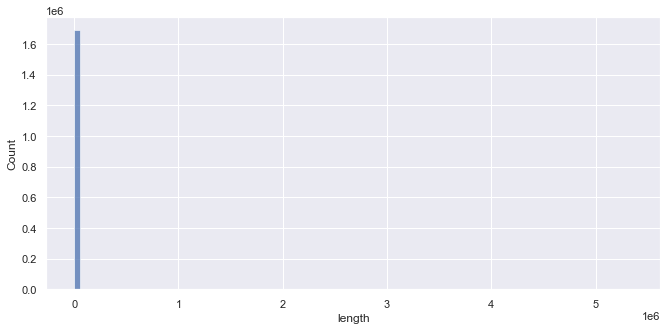

In [82]:
lengths = [len(error) for error in df['error message']]
histogram = sns.histplot(lengths, bins=100)
histogram.set_xlabel("length")

WordCloud

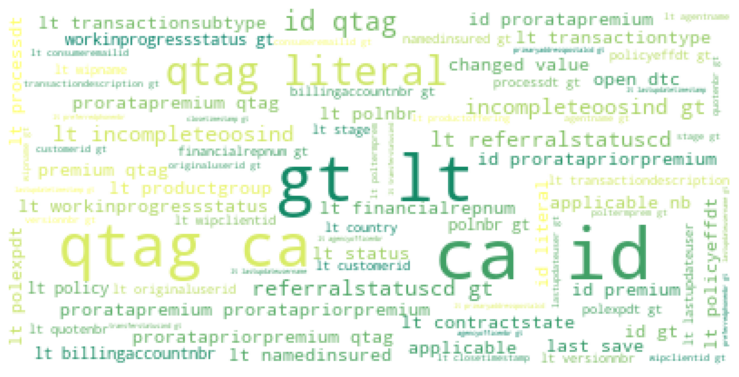

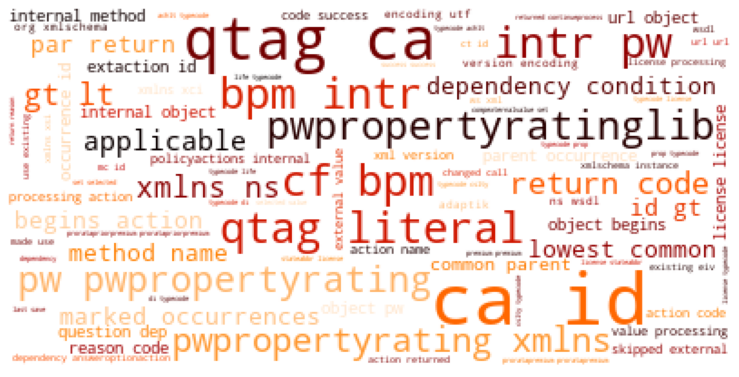

In [90]:
df_train = pd.read_csv("train.csv")

df_train.dropna(inplace=True)

df_pos = df_train[df_train['label'] == 1]
df_neg = df_train[df_train['label'] == 0]

pos_words = []
neg_words = []

for error_message in df_pos['error message']:
    pos_words.append(error_message)
pos_words = ' '.join(pos_words)

for error_message in df_neg['error message']:
    neg_words.append(error_message)
neg_words = ' '.join(neg_words)

pos_wordcloud = WordCloud().generate(pos_words)
pos_wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.show()

neg_wordcloud = WordCloud().generate(neg_words)
neg_wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.show()